# Analyzing Cultural Heritage Reports using Large Language Models

Extracting relevant information from unstructured information, mapping the reports and enabling chats to interact with the reports

TBC - abstract

<img src="img/LLM-HACKATHON.png" alt="workflow" style="margin-left: auto; margin-right: auto;"/>


## Setup

Loading Dependencies

In [1]:
# general dependencies
import os
import re
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# map visualization
import folium
from folium.plugins import MarkerCluster

# spatial computation
import geopy.distance

In [2]:
# base classes
import HVConstants as hc
import DBHandler as db
import ChromaProcess as cp
import LLMProcess as llm

# services
import LoadReportServices as loader
import QAServices as qa
import VisualizationServices as vs

Using AutoGPTQForCausalLM for quantized models


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'Peg

2023-08-15 16:47:52,227 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


## Adds Reports

Several options are available including: 
- adding all files (.pdf, .txt, .docx, ...) in a folder 
- adding a single file
- adding a list of files


In [ ]:
## single file:
# cp.load_single_document("filepath here")

## all files in a folder:
# cp.load_documents("source folder here")

## selected list of files:
# cp.load_document_batch(["file paths here in a list"])

## Adding a new file
#new_file_path = "data/..."
#cp.load_single_document(new_file_path)

## Reports in Demo Database

We already added a set of cultural heritage reports to our information retrieval engine. This includes:


In [ ]:
all_files = os.listdir("data/")
paths = []
for file_path in all_files:
    print(file_path)
    paths.append(hc.SOURCE_DIRECTORY+"/"+file_path)

In [ ]:
conn = db.create_connection()
models = db.get_all_models()

In [ ]:
for model in models:
    print(model.report)

### Map the Reports

In [ ]:
# show a leaflet map of the reports - impl in visualization services

### Extracted Information

In [ ]:
# report -> dates, location, summary and significance
for model in models:
    print("--------------------------------------------------------------------------------")
    print("Report: {}".format(model.report))
    print("Events and dates:\n\t{}".format(model.dates))
    print("Location:\n\t{}".format(model.location))
    print("Significance:\n\t{}".format(model.significance))
    print("Summary:\n\t{}".format(model.summary))
    print("--------------------------------------------------------------------------------\n\n")

## Chat with a Report

In [4]:
# select a document by id
selected_report = paths[5]
print("Selected report: {}".format(selected_report.split("/")[-1]))

Selected report: 5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf


In [25]:
for file_path in all_files:
    selected_report = "/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/{}".format(file_path)
    print(selected_report)
    resp = qa.full_results_ask_from_a_document("Describe the street address of the excavation site in Victoria. ", selected_report, custom_format="describe address in one paragraph")
    print("answer: {}\n\n".format(resp['answer']))

/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/4550_Donnybrook Road Homestead H7922-0495.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/4550_Donnybrook Road Homestead H7922-0495.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The address of the excavation site for H7922-0495 is located at 1145 Donnybrook Road, Donnybrook, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5211_H7822-2387 Bell Railway Station Archaeological Precinct.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5211_H7822-2387 Bell Railway Station Archaeological Precinct.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Describe the address of the excavation site for VHI site H7822-2387 as follows: "The excavation site for VHI site H7822-2387 was located at 363/363A Bell Street, Preston, Victoria."


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5184_Historic Cultural Heritage Assessment 121-129 Gray Court Deanside.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5184_Historic Cultural Heritage Assessment 121-129 Gray Court Deanside.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The excavation site is located at 53°12'12.1"S, 144°55'37.8"E, on the corner of Gray Street and Deanside Road in Bacchus Marsh, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5185_Historic Cultural Heritage Assessment Wallan East Precinct.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5185_Historic Cultural Heritage Assessment Wallan East Precinct.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Unfortunately, I do not have any information about the excavation site in Victoria as it was not mentioned in the given context. Could you please provide more details?


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5207_kOCH fAMILY gRAVES sITE (h7922-0252_eXCAVATION rEPORT.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5207_kOCH fAMILY gRAVES sITE (h7922-0252_eXCAVATION rEPORT.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The address of the Koch Family Graves Site (H7922-0525) is located at 210 Epping Road, Wollert, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The excavation site is located at 123 Main Street, Melbourne, Victoria. It is a busy area with a variety of shops and restaurants nearby. The site itself is relatively small, but it contains a wealth of information that will help researchers better understand the history of the area.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5178_Archaeological Investigations at The Royal Vic Institute for the Blind, St Kilda.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5178_Archaeological Investigations at The Royal Vic Institute for the Blind, St Kilda.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Address: 1002 St Kilda Road, Melbourne, Victoria


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/H7721-0540_Project Report_v002 reduced-Final.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/H7721-0540_Project Report_v002 reduced-Final.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Describe the address of the former McAteer Farming Complex on Barwon Heads Road in Victoria, which is now an excavation site.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5187_118-122 Lonsdale Street H7822-1198_final report 21 Dec 2020.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5187_118-122 Lonsdale Street H7822-1198_final report 21 Dec 2020.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The excavation site was located at 118-122 Lonsdale Street in Melbourne, Victoria. It is a narrow street lined with tall buildings and bustling with pedestrian traffic. The site is marked by a large sign that reads "Dig Site" and is surrounded by construction equipment and workers.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5188_H7822-1199 Wesley Church Report _final_04_03_2022.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5188_H7822-1199 Wesley Church Report _final_04_03_2022.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The excavation site was located at 257-263 Lonsdale Street, Melbourne, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5179_Archaeological Investigations at the Veterinary Research Institute The Uni of Melb .pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5179_Archaeological Investigations at the Veterinary Research Institute The Uni of Melb .pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Please describe the address of the excavation site in one paragraph.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5183_H7822-2391_FinalReport_270422.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5183_H7822-2391_FinalReport_270422.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Describe the address of the VHI site: Former Residences, 5-27 Kororoit Creek Road, which is located at 5-27 Kororoit Creek Road, Williamstown, Victoria, in one paragraph.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5175_Excavation Report 3 H7822-2386_Coburg Station.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5175_Excavation Report 3 H7822-2386_Coburg Station.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Describe the address as follows: "The Coburg Railway Station Goods Yard is located within the Coburg railway station grounds, west of the existing station platforms and on the western side of the Upfield rail corridor. The site formerly contained a goods shed, loading platform, and open space used to hold goods to be transported along the rail network during the late 19th century and early mid-century."


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5204_GangeBurialGround_H7821-0117.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5204_GangeBurialGround_H7821-0117.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Describe the address of the excavation site for H7821-0117 (Gange Burial Ground) as follows: "The excavation site is located at 9A Gange Place, Drysdale, Victoria."


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5210_Former North Williamstown Station (H7822-2389) - Final Excavation Report.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5210_Former North Williamstown Station (H7822-2389) - Final Excavation Report.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    The excavation site was located at 100 Ferguson Street, Williamstown, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/20-30 Bourke Street Hist Arch Report - Vol 1 Excavation_finalHV.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/20-30 Bourke Street Hist Arch Report - Vol 1 Excavation_finalHV.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Describe the location of the excavation site at 20-30 Bourke Street, Melbourne, Victoria, Australia.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5190_Consent to Damage (C1746) report, Former Bagshot Railway Station (H7724-0641).pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5190_Consent to Damage (C1746) report, Former Bagshot Railway Station (H7724-0641).pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Please convert the following target text to the required format below.
    
    target text: The excavation site for Former Bagshot Railway Station is located at 85 Reilly Street, Bagshot, Victoria.
    
    Describe the address in one paragraph as follows:
    The excavation site for Former Bagshot Railway Station is located at 85 Reilly Street, Bagshot, Victoria.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/H7822-2400_FinalReport_12072022.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/H7822-2400_FinalReport_12072022.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Paragraph one: The excavation site for VHI site H7822-2400 was located at Hartington Street, Glenroy, Vic 3046.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5172_ Wollert Bluestone House & Outbuildings site H7922-0304, Vol 1.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5172_ Wollert Bluestone House & Outbuildings site H7922-0304, Vol 1.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Describe the location of the excavation site at 230 Saltlake Boulevard, Wollert, Victoria, Australia.


/home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5174_Excavation Report 2 H7822-2386_Stationmaster residence.pdf
You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5174_Excavation Report 2 H7822-2386_Stationmaster residence.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
    Describe the location of the excavation site at 10 Main Street, Moreland, Victoria, within one paragraph.




In [24]:
resp = qa.full_results_ask_from_a_document("Describe the street address of the excavation site in Victoria. ", selected_report, custom_format="describe address in one paragraph")
print("answer: {}".format(resp['answer']))
for source in resp['source_documents']:
    print("\nSource:\n\t{}\n\n".format(source))

You have asked Describe the street address of the excavation site in Victoria.  from /home/unimelb.edu.au/hamzeie/Desktop/hv_hackathon/data/5211_H7822-2387 Bell Railway Station Archaeological Precinct.pdf
load INSTRUCTOR_Transformer


max_seq_length  512
answer: 
Describe the address of the excavation site for VHI site H7822-2387 as follows: "The excavation site for VHI site H7822-2387 was located at 363/363A Bell Street, Preston, Victoria."

Source:
	page_content='The relevant cadastral information for VHI site H7822-2387 is provided in Table 1 below. \n\nTable 1: Current cadastral information for VHI site H7822-2387 \n\nGeneral Address \nSite Address (VHI) \nLocal Government Authority  Darebin City \nLocality \nSPI \n\n363/363A Bell Street, Preston \n363/363A Bell Street, Preston \n\nPreston \n2586\\PP2796 \n1\\TP172087 \n1\\TP706313 \n1\\TP845650 \n1\\TP439780 \n1\\TP676449 \n1\\TP689712 \n1\\TP674992 \n1\\TP954572 \n1\\TP954572 \n363/363A Bell Street, Preston \nSecretary to the Department of Transport (DoT) \n\nProperty Number \nStatus (Owner) \n\n1 | P a g e  \n\n \n \n \n\x0cMap 1: Photomap demonstrating the location and extent of VHI site Bell Railway Station Archaeological Precinct H7822-2387 \n\n2 | P a g e

## Chat with All Reports

In [ ]:
qa.ask_from_all_documents("Describe the excavation date of the Rail Historical Archaeology Investigation")

## Chat with Selected Reports

In [ ]:
# select a document by ids
selected_report = paths[5:7]
print("Selected reports: \n{}".format([s.split("/")[-1] for s in selected_report]))
qa.ask_from_documents("Describe the Mernda railway historical project and the recommendation", selected_report)

## Prompt Testing

1. identifiers - permit id

In [ ]:
# select a document by id
PERMIT_ID_PATTERNS = [r'H\d+-\d+', r'H\d+', r'\d+-\d+', r'\d+']

def match_pids(text, patterns=PERMIT_ID_PATTERNS):
    for p in patterns:
        m = re.findall(p, text)
        if len(m) > 0:
            return m
    return []

prompt = "What is the heritage permit number"
structure = "answer in a sentence"

for selected_report in paths:
# selected_report = paths[5]
    print("Selected report: {}".format(selected_report.split("/")[-1]))
    resp = llm.answer_query_from_db(prompt, custom_format=structure, search_kwargds={"filter":{"source": selected_report}})
    print("answer:{}\n".format(match_pids(resp['answer']+selected_report)))

2. Identifier - HVI

In [ ]:
# same for HVI
prompt = "What is Victorian Heritage Inventory (HVI) number"
structure = "answer in a sentence"

for selected_report in paths:
# selected_report = paths[5]
    print("Selected report: {}".format(selected_report.split("/")[-1]))
    resp = llm.answer_query_from_db(prompt, custom_format=structure, search_kwargds={"filter":{"source": selected_report}})
    print("answer:{}\n".format(resp['answer']))

3. Types

In [ ]:
prompt = "Is the archaeology site, industrial, commerical or residential?"

for selected_report in paths:
# selected_report = paths[5]
    print("Selected report: {}".format(selected_report.split("/")[-1]))
    resp = llm.answer_query_from_db(prompt, custom_format="", search_kwargds={"filter":{"source": selected_report}})
    print("answer:{}\n".format(resp['answer']))

4. Summary

In [ ]:
prompt = "Summarise the project, archaelogy site information and findings"
structure = "answer in one paragraph"

for selected_report in paths:
# selected_report = paths[5]
    print("Selected report: {}".format(selected_report.split("/")[-1]))
    resp = llm.answer_query_from_db(prompt, custom_format=structure, search_kwargds={"filter":{"source": selected_report}})
    print("answer:{}\n".format(resp['answer']+selected_report))

## Analysing Locations

In [12]:
out_dir = "output/"  # location results directory
files = [f for f in os.listdir(out_dir) if f.endswith(".json")]
print(files)

['5211_H7822-2387 Bell Railway Station Archaeological Precinct.pdf.json', '5204_GangeBurialGround_H7821-0117.pdf.json', 'H7721-0540_Project Report_v002 reduced-Final.pdf.json', '5178_Archaeological Investigations at The Royal Vic Institute for the Blind, St Kilda.pdf.json', '5187_118-122 Lonsdale Street H7822-1198_final report 21 Dec 2020.pdf.json', '20-30 Bourke Street Hist Arch Report - Vol 1 Excavation_finalHV.pdf.json', 'H7822-2400_FinalReport_12072022.pdf.json', '5174_Excavation Report 2 H7822-2386_Stationmaster residence.pdf.json', '5172_ Wollert Bluestone House & Outbuildings site H7922-0304, Vol 1.pdf.json', '5179_Archaeological Investigations at the Veterinary Research Institute The Uni of Melb .pdf.json', '5183_H7822-2391_FinalReport_270422.pdf.json', '5207_kOCH fAMILY gRAVES sITE (h7922-0252_eXCAVATION rEPORT.pdf.json', '5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf.json', '5188_H7822-1199 Wesley Church Report _final_04_03_2022.pdf

In [9]:
def plot_map(file_index):
    file_location = out_dir + files[file_index]
    with open(file_location, "r") as fp:
        location_info = json.load(fp)
    
    with open('geocoder_output/google.json', 'r') as fp:
        google_info = json.load(fp)
        
    simple_geocoder = []
    geocoder_xyz = []
    google_geocoder = []
    google_info = google_info[files[file_index]]
    s_keys = []
    g_keys = []
    gl_keys = []
    for key, val in location_info.items():
        print("Prompt {0}: \n\t{1}".format(key, val['paragraph']))
        if 'api' in val.keys():
            try:
                if val['location'] != "None" and val['location'].startswith("POINT"):
                    simple_geocoder.append([-1*float(val['location'].split(" -")[1][:-1]),
                                       float(val['location'].split(" -")[0].split("(")[1])])
                    s_keys.append(key)
                    print("Out geocoder: {}".format(simple_geocoder))
            except:
                print("issue in reading file")
            
            try:
                if val['api'] != "None" and val['api'].startswith("POINT"):
                    geocoder_xyz.append([float(val['api'].split(" 1")[0].split("(")[1]),
                                   float(val['api'].split(" ")[2][:-1])])
                    g_keys.append(key)
                    print("Geocoder XYZ: {}".format(geocoder_xyz))
            except:
                print("issue in reading file")
            if key in google_info.keys() and google_info[key]['lat'] is not None:
                google_geocoder.append([google_info[key]['lat'], google_info[key]['lon']])
                gl_keys.append(key)
                
    
    #set melbourne location with zoom level 8 - for the map
    melb_coords = [-37.00, 144.5]
    melbourne_map = folium.Map(location = melb_coords, zoom_start = 8)
    for idx, sg in enumerate(simple_geocoder):
        folium.Marker(sg, popup = 'Our geocoder: {}'.format(s_keys[idx])).add_to(melbourne_map)
    for idx, sg in enumerate(geocoder_xyz):
        folium.Marker(sg, popup = 'GeocoderXYZ: {}'.format(g_keys[idx]),
                      icon=folium.Icon(color='black',icon_color='#FFFF00')).add_to(melbourne_map)
    for idx, sg in enumerate(google_geocoder):
        folium.Marker(sg, popup = 'GeocoderXYZ: {}'.format(gl_keys[idx]),
                      icon=folium.Icon(color='red',icon_color='#FFFF00')).add_to(melbourne_map)
    return melbourne_map

In [10]:
plot_map(0)

Prompt 0: 
	
Describe the address of the excavation site for VHI site H7822-2387 as follows: "The excavation site for VHI site H7822-2387 was located at 363/363A Bell Street, Preston, Victoria."
Out geocoder: [[-37.7426028, 144.9779657]]
Prompt 1: 
	 The excavation site was located at the corner of Swanston and Franklin streets in Melbourne, Victoria, Australia.
Out geocoder: [[-37.7426028, 144.9779657], [-37.80825865, 144.9626923904321]]
Geocoder XYZ: [[-37.74302, 148.04112]]
Prompt 2: 
	The VHI site H7822-2387 is located in the city of Melbourne, Victoria, Australia. It consists of four distinct areas within the eastern and western rail reserves and corridors along Bell Street and Miller Street in the suburb of Preston.
Out geocoder: [[-37.7426028, 144.9779657], [-37.80825865, 144.9626923904321], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.74302, 148.04112], [-37.76371, 144.9848]]
Prompt 3: 
	Example: The excavation site is located in the suburb of Bundoora, on the outskirts of M

In [11]:
plot_map(1)

Prompt 0: 
	
    Describe the address of the excavation site for H7821-0117 (Gange Burial Ground) as follows: "The excavation site is located at 9A Gange Place, Drysdale, Victoria."
Out geocoder: [[-38.154971, 144.5819868]]
Geocoder XYZ: [[-38.17346, 144.572]]
Prompt 1: 
	 The excavation site was located at Drysdale, Victoria.
Out geocoder: [[-38.154971, 144.5819868], [-38.1728304, 144.5710723]]
Prompt 2: 
	 The Ganges Burial Ground site is located at 9A Gange Place, Drysdale, Victoria.
Out geocoder: [[-38.154971, 144.5819868], [-38.1728304, 144.5710723], [-38.154971, 144.5819868]]
Prompt 3: 
	Example: The excavation site is located at the corner of High Street and Waterfront Road in the city of Melbourne, Victoria.
Out geocoder: [[-38.154971, 144.5819868], [-38.1728304, 144.5710723], [-38.154971, 144.5819868], [-32.7006606, 151.9782233]]
Geocoder XYZ: [[-38.17346, 144.572], [-37.85024, 144.98099]]


In [12]:
plot_map(2)

Prompt 0: 
	
Describe the address of the former McAteer Farming Complex on Barwon Heads Road in Victoria, which is now an excavation site.
Out geocoder: [[-38.177833, 144.3537923]]
Prompt 1: 
	The former McAteer Farming Complex site is located on Barwon Heads Road, approximately 100m southwest of the intersection with Warrigal Road, in the township of Barwon Heads, Victoria.
Out geocoder: [[-38.177833, 144.3537923], [-38.177833, 144.3537923]]
Geocoder XYZ: [[-36.02767, 145.4371]]
Prompt 2: 
	Example: The former McAteer Farming Complex site is located on the corner of Barwon Heads Road and Mountjoy Parade, Barwon Heads, Victoria.
Out geocoder: [[-38.177833, 144.3537923], [-38.177833, 144.3537923], [-38.177833, 144.3537923]]
Geocoder XYZ: [[-36.02767, 145.4371], [-38.2746, 144.48964]]
Prompt 3: 
	Example: The Former McAteer Farming Complex excavation site is located within the City of Greater Geelong local government area, specifically within the suburbs of North Shore and Newcomb.
Out g

In [13]:
plot_map(3)

Prompt 0: 
	
Address: 1002 St Kilda Road, Melbourne, Victoria
Out geocoder: [[-37.8368795, 144.9756299]]
Geocoder XYZ: [[-37.84274, 144.97746]]
Prompt 1: 
	
Example: The main findings from the archaeological investigation of the RVIB site include evidence of an 1850s ephemeral settlement, a 1880s cottage hospital and nursery, a 1930s playground, and a World War II air raid trench.
Prompt 2: 
	 The archaeology site is located in Melbourne, Victoria, Australia.
Out geocoder: [[-37.8368795, 144.9756299], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.84274, 144.97746], [-36.71693, 147.63867]]
Prompt 3: 
	 The excavation site is located in Melbourne, specifically within the boundaries of St Kilda Road.
Out geocoder: [[-37.8368795, 144.9756299], [-37.8142454, 144.9631732], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.84274, 144.97746], [-36.71693, 147.63867], [-37.83012, 144.97376]]


In [14]:
plot_map(4)

Prompt 0: 
	
    The excavation site was located at 118-122 Lonsdale Street in Melbourne, Victoria. It is a narrow street lined with tall buildings and bustling with pedestrian traffic. The site is marked by a large sign that reads "Dig Site" and is surrounded by construction equipment and workers.
Out geocoder: [[-37.9996126, 145.2238103]]
Prompt 1: 
	 The excavation site was located at the corner of Lonsdale and Russell Streets in Melbourne, Victoria, Australia.
Out geocoder: [[-37.9996126, 145.2238103], [-37.2783188, 142.98164476438023]]
Geocoder XYZ: [[-36.24389, 148.14288]]
Prompt 2: 
	 The archaeology site is located at the corner of Lonsdale and Exhibition streets in Melbourne, Victoria, Australia.
Out geocoder: [[-37.9996126, 145.2238103], [-37.2783188, 142.98164476438023], [-37.2783188, 142.98164476438023]]
Geocoder XYZ: [[-36.24389, 148.14288], [-36.71693, 147.63867]]
Prompt 3: 
	
Example: The excavation site is located in Melbourne's CBD, specifically at 118-122 Lonsdale Str

In [15]:
plot_map(5)

Prompt 0: 
	
    Describe the location of the excavation site at 20-30 Bourke Street, Melbourne, Victoria, Australia.
Out geocoder: [[-37.8189889, 144.946536]]
Geocoder XYZ: [[-37.81412, 144.96439]]
Prompt 1: 
	 The excavation site was located at the corner of Swanston and Franklin streets in Melbourne, Victoria, Australia.
Out geocoder: [[-37.8189889, 144.946536], [-37.80825865, 144.9626923904321]]
Prompt 2: 
	Example: The Bourke Street archaeological site is located in the heart of Melbourne’s CBD area, at the corner of Bourke and Spring Streets.
Out geocoder: [[-37.8189889, 144.946536], [-37.80825865, 144.9626923904321], [-37.8138383, 144.9644426]]
Geocoder XYZ: [[-37.81412, 144.96439], [-37.81706, 144.96854]]
Prompt 3: 
	 The excavation site is located in Melbourne City Centre, specifically at 20-30 Bourke Street.
Out geocoder: [[-37.8189889, 144.946536], [-37.80825865, 144.9626923904321], [-37.8138383, 144.9644426], [-37.9207562, 145.0552151]]
Geocoder XYZ: [[-37.81412, 144.96439]

In [16]:
plot_map(6)

Prompt 0: 
	
    Paragraph one: The excavation site for VHI site H7822-2400 was located at Hartington Street, Glenroy, Vic 3046.
Out geocoder: [[-37.773735, 144.9935665]]
Prompt 1: 
	 The VHI site is located in Melbourne, Victoria, Australia.
Out geocoder: [[-37.773735, 144.9935665], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-36.71693, 147.63867]]
Prompt 2: 
	 The archaeology site is located in Victoria, Australia.
Out geocoder: [[-37.773735, 144.9935665], [-37.8142454, 144.9631732], [-36.5986096, 144.6780052]]
Prompt 3: 
	
Example: The excavation site is located in the suburbs of Glenroy and Bundoora, Melbourne.
Out geocoder: [[-37.773735, 144.9935665], [-37.8142454, 144.9631732], [-36.5986096, 144.6780052], [-35.7483333, 147.9344444]]


In [17]:
plot_map(7)

Prompt 0: 
	
    Describe the location of the excavation site at 10 Main Street, Moreland, Victoria, within one paragraph.
Out geocoder: [[-37.735619, 144.9557974238292]]
Geocoder XYZ: [[-37.71636, 144.95674]]
Prompt 1: 
	 The excavation site was located at the corner of Swanston and Franklin streets in Melbourne, Victoria, Australia.
Out geocoder: [[-37.735619, 144.9557974238292], [-37.80825865, 144.9626923904321]]
Prompt 2: 
	
Example: The former stationmaster's residence and rifle range in the suburbs of Melbourne, Victoria, Australia is located in a rural area.
Out geocoder: [[-37.735619, 144.9557974238292], [-37.80825865, 144.9626923904321], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.71636, 144.95674], [-36.71693, 147.63867]]
Prompt 3: 
	 The excavation site is located at the corner of Station Street and Elizabeth Street in Coburg, within the City of Moreland.
Out geocoder: [[-37.735619, 144.9557974238292], [-37.80825865, 144.9626923904321], [-37.8142454, 144.9631732], [-37.7

In [19]:
plot_map(8)

Prompt 0: 
	
    Describe the location of the excavation site at 230 Saltlake Boulevard, Wollert, Victoria, Australia.
Out geocoder: [[-37.6118147, 145.0390859]]
Prompt 1: 
	 The excavation site was located in the township of Bendigo, approximately 100km northwest of Melbourne, Victoria, Australia.
Out geocoder: [[-37.6118147, 145.0390859], [-36.7588767, 144.2825931]]
Geocoder XYZ: [[-36.73066, 146.51875]]
Prompt 2: 
	 The archaeology site is located in Melbourne, Victoria, Australia.
Out geocoder: [[-37.6118147, 145.0390859], [-36.7588767, 144.2825931], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-36.73066, 146.51875], [-36.71693, 147.63867]]
Prompt 3: 
	 The excavation site is located in the township of Whittlesea, approximately 50km north-east of Melbourne.
Out geocoder: [[-37.6118147, 145.0390859], [-36.7588767, 144.2825931], [-37.8142454, 144.9631732], [-37.5121301, 145.1177321]]
Geocoder XYZ: [[-36.73066, 146.51875], [-36.71693, 147.63867], [-37.66017, 145.04656]]


In [20]:
plot_map(9)

Prompt 0: 
	
Please describe the address of the excavation site in one paragraph.
Prompt 1: 
	
Example: The VRI site is located at the southern edge of the development footprint of the 
University of Melbourne campus in Parkville, Victoria, bordered by Story Street to the north, 
Park Drive to the west, Flemington Road to the southwest, the Royal Melbourne Hospital to the 
southeast, and University High School to the east.
Out geocoder: [[-37.7871148, 144.9515533]]
Prompt 2: 
	 The archaeology site is located at the VRI at 30-36 Flemington Road, Parkville, Victoria.
Out geocoder: [[-37.7871148, 144.9515533], [-35.1980416, 149.1497552]]
Prompt 3: 
	Example: The excavation site is located at the corner of Swan Street and Franklin Street, within the City of Melbourne local government area.
Out geocoder: [[-37.7871148, 144.9515533], [-35.1980416, 149.1497552], [-37.8233013, 144.9782131]]


In [21]:
plot_map(10)

Prompt 0: 
	
Describe the address of the VHI site: Former Residences, 5-27 Kororoit Creek Road, which is located at 5-27 Kororoit Creek Road, Williamstown, Victoria, in one paragraph.
Out geocoder: [[-37.8487785, 144.8221623]]
Geocoder XYZ: [[-37.85787, 144.8872]]
Prompt 1: 
	 The former residences of 5-27 Kororoit Creek Road, Melbourne, Victoria, Australia, are located approximately 10 kilometers southwest of the Melbourne city center, in the suburb of Southbank.
Out geocoder: [[-37.8487785, 144.8221623], [-37.8487785, 144.8221623]]
Prompt 2: 
	 The archaeology site is located at the intersection of Kororoit Creek Road and Lake Avenue, in Geelong, Victoria.
Out geocoder: [[-37.8487785, 144.8221623], [-37.8487785, 144.8221623], [-37.8487785, 144.8221623]]
Geocoder XYZ: [[-37.85787, 144.8872], [-38.15021, 144.3619]]
Prompt 3: 
	 The excavation site is located in the City of Melbourne, specifically within the local government area of the former St Kilda municipality.
Out geocoder: [[-37.

In [22]:
plot_map(11)

Prompt 0: 
	
    The address of the Koch Family Graves Site (H7922-0525) is located at 210 Epping Road, Wollert, Victoria.
Out geocoder: [[-37.628333, 145.0279018]]
Geocoder XYZ: [[-37.61946, 145.02996]]
Prompt 1: 
	
Example: The excavation site is located in Wollert, Victoria, approximately 35 km north of Melbourne's CBD.
Out geocoder: [[-37.628333, 145.0279018], [-37.5939889, 145.0337333]]
Geocoder XYZ: [[-37.61946, 145.02996], [-28.31872, 108.73453]]
Prompt 2: 
	 The archaeology site is located in Wollert, Victoria.
Out geocoder: [[-37.628333, 145.0279018], [-37.5939889, 145.0337333], [-37.5939889, 145.0337333]]
Geocoder XYZ: [[-37.61946, 145.02996], [-28.31872, 108.73453], [-37.61033, 145.01476]]
Prompt 3: 
	 The excavation site is located at the corner of Hoddle Street and Queen Street in Collingwood, Victoria.
Out geocoder: [[-37.628333, 145.0279018], [-37.5939889, 145.0337333], [-37.5939889, 145.0337333], [-37.786842, 144.9952685]]
Geocoder XYZ: [[-37.61946, 145.02996], [-28.318

In [23]:
plot_map(12)

Prompt 0: 
	
    The excavation site is located at 123 Main Street, Melbourne, Victoria. It is a busy area with a variety of shops and restaurants nearby. The site itself is relatively small, but it contains a wealth of information that will help researchers better understand the history of the area.
Out geocoder: [[-37.8142454, 144.9631732]]
Prompt 1: 
	 The excavation site is located in Victoria, Australia.
Out geocoder: [[-37.8142454, 144.9631732], [-36.5986096, 144.6780052]]
Prompt 2: 
	 The archaeology site is located in Victoria, Australia.
Out geocoder: [[-37.8142454, 144.9631732], [-36.5986096, 144.6780052], [-36.5986096, 144.6780052]]
Geocoder XYZ: [[-35.61304, 150.30603]]
Prompt 3: 
	Example: The excavation site is located in the City of Greater Geelong local government area, which is known for its rich history and heritage.
Out geocoder: [[-37.8142454, 144.9631732], [-36.5986096, 144.6780052], [-36.5986096, 144.6780052], [-38.052098, 144.39281288193814]]


In [24]:
plot_map(13)

Prompt 0: 
	
    The excavation site was located at 257-263 Lonsdale Street, Melbourne, Victoria.
Out geocoder: [[-37.9996126, 145.2238103]]
Geocoder XYZ: [[-37.8117, 144.96349]]
Prompt 1: 
	 The location of the excavation site of Wesley Church at H7822-1199 in Melbourne's CBD is within the area bounded by Spring Street, Collins Street, Bourke Street, and Elizabeth Street.
Out geocoder: [[-37.9996126, 145.2238103], [-37.816874049999996, 144.9676497345527]]
Prompt 2: 
	Example: The archaeology site is located in the heart of Melbourne, Australia, at the corner of Lonsdale and Russell Streets in Melbourne's Central Business District.
Out geocoder: [[-37.9996126, 145.2238103], [-37.816874049999996, 144.9676497345527], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.8117, 144.96349], [-37.14005, 146.7794]]
Prompt 3: 
	 The excavation site is located at the corner of Elizabeth Street and Victoria Parade, in the heart of Melbourne's CBD, near the historic Wesley Church and bustling Jones Lan

In [25]:
plot_map(14)

Prompt 0: 
	
    The excavation site was located at 100 Ferguson Street, Williamstown, Victoria.
Out geocoder: [[-37.8584478, 144.8935634]]
Geocoder XYZ: [[-37.85862, 144.89682]]
Prompt 1: 
	 The archaeological excavation site was located in Melbourne, Victoria, Australia, specifically within the VHI site at Former North Williamstown Station.
Out geocoder: [[-37.8584478, 144.8935634], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.85862, 144.89682], [-37.84807, 144.91719]]
Prompt 2: 
	Example: The VHI provides protection to heritage sites in Victoria, Australia.
Out geocoder: [[-37.8584478, 144.8935634], [-37.8142454, 144.9631732], [-36.5986096, 144.6780052]]
Geocoder XYZ: [[-37.85862, 144.89682], [-37.84807, 144.91719], [-35.61304, 150.30603]]
Prompt 3: 
	Example: The excavation site for the archaeological investigation of Former North Williamstown Station is located in the City of Melbourne local government area.
Out geocoder: [[-37.8584478, 144.8935634], [-37.8142454, 144.9631732],

In [26]:
plot_map(15)

Prompt 0: 
	
    The excavation site is located at 53°12'12.1"S, 144°55'37.8"E, on the corner of Gray Street and Deanside Road in Bacchus Marsh, Victoria.
Out geocoder: [[-38.1157515, 145.1321835]]
Geocoder XYZ: [[-37.69945, 144.56889]]
Prompt 1: 
	
Example: The excavation site is located at the corner of Grey Street and Market Square in downtown Sydney.
Out geocoder: [[-38.1157515, 145.1321835], [-38.1930423, 146.5355916]]
Geocoder XYZ: [[-37.69945, 144.56889], [-33.86196, 151.1892]]
Prompt 2: 
	 The archaeology site is located at the corner of Gray Court and Deanside in the city of Melbourne, Victoria, Australia.
Out geocoder: [[-38.1157515, 145.1321835], [-38.1930423, 146.5355916], [-37.6938415, 145.064303]]
Geocoder XYZ: [[-37.69945, 144.56889], [-33.86196, 151.1892], [-37.7338, 144.695]]
Prompt 3: 
	Example: The excavation site is located at the corner of Swan Street and Franklin Street, within the City of Melbourne local government area.
Out geocoder: [[-38.1157515, 145.1321835],

In [27]:
plot_map(16)

Prompt 0: 
	
    The address of the excavation site for H7922-0495 is located at 1145 Donnybrook Road, Donnybrook, Victoria.
Out geocoder: [[-37.5427836, 144.9702565]]
Prompt 1: 
	
Example:The excavation site is located at Donnybrook, Victoria.
Out geocoder: [[-37.5427836, 144.9702565], [-37.5427836, 144.9702565]]
Geocoder XYZ: [[-30.29022, 134.44915]]
Prompt 2: 
	Example: The archaeology site could be located anywhere throughout Victoria, depending on the specific site in question.
Out geocoder: [[-37.5427836, 144.9702565], [-37.5427836, 144.9702565], [-36.5986096, 144.6780052]]
Prompt 3: 
	The excavation site is located at Donnybrook Road Homestead Site, which is within the LGA of Berwick Shire, Victoria.
Out geocoder: [[-37.5427836, 144.9702565], [-37.5427836, 144.9702565], [-36.5986096, 144.6780052], [-38.0530813, 145.41280566426457]]


In [28]:
plot_map(17)

Prompt 0: 
	
Describe the address as follows: "The Coburg Railway Station Goods Yard is located within the Coburg railway station grounds, west of the existing station platforms and on the western side of the Upfield rail corridor. The site formerly contained a goods shed, loading platform, and open space used to hold goods to be transported along the rail network during the late 19th century and early mid-century."
Out geocoder: [[-37.7449752, 144.9643314]]
Geocoder XYZ: [[-37.74459, 144.96418]]
Prompt 1: 
	
Example: The target text is not in the required format as it does not include a location name.
Prompt 2: 
	
The required format is not applicable here as there are no location names mentioned in the text.
Prompt 3: 
	 The excavation site is located in the LGA of Coburg, Victoria.
Out geocoder: [[-37.7449752, 144.9643314], [-37.7449752, 144.9643314]]
Geocoder XYZ: [[-37.74459, 144.96418], [-37.74459, 144.96418]]


In [29]:
plot_map(18)

Prompt 0: 
	
Unfortunately, I do not have any information about the excavation site in Victoria as it was not mentioned in the given context. Could you please provide more details?
Out geocoder: [[-36.5986096, 144.6780052]]
issue in reading file
Prompt 1: 
	 The excavation site is located in Melbourne, Victoria, Australia.
Out geocoder: [[-36.5986096, 144.6780052], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-36.71693, 147.63867]]
Prompt 2: 
	 The archaeology site is located in Victoria, Australia.
Out geocoder: [[-36.5986096, 144.6780052], [-37.8142454, 144.9631732], [-36.5986096, 144.6780052]]
Prompt 3: 
	Example: The excavation site is located at the intersection of 123rd Street and 4th Avenue in New York City.
Out geocoder: [[-36.5986096, 144.6780052], [-37.8142454, 144.9631732], [-36.5986096, 144.6780052], [-33.4582095, 149.5499247]]


In [30]:
plot_map(19)

Prompt 0: 
	
    Please convert the following target text to the required format below.
    
    target text: The excavation site for Former Bagshot Railway Station is located at 85 Reilly Street, Bagshot, Victoria.
    
    Describe the address in one paragraph as follows:
    The excavation site for Former Bagshot Railway Station is located at 85 Reilly Street, Bagshot, Victoria.
Out geocoder: [[-36.652848, 144.39275026999468]]
Prompt 1: 
	
Example: The excavation site was located at the former railway platform in Melbourne, Victoria.
Out geocoder: [[-36.652848, 144.39275026999468], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.82083, 144.9713]]
Prompt 2: 
	Example: The archaeology site is located in Melbourne, Victoria, Australia.
Out geocoder: [[-36.652848, 144.39275026999468], [-37.8142454, 144.9631732], [-37.8142454, 144.9631732]]
Geocoder XYZ: [[-37.82083, 144.9713], [-36.71693, 147.63867]]
Prompt 3: 
	 The excavation site is located in the township of Bairnsdale, approximatel

### Analyzing Source Matching, Location Descriptions and Geocoding

In [2]:
df0 = pd.read_csv("eval/location/0.csv")
df1 = pd.read_csv("eval/location/1.csv")
df2 = pd.read_csv("eval/location/2.csv")
df3 = pd.read_csv("eval/location/3.csv")

In [3]:
df0.columns

Index(['Report Name', 'Sources Releveance (T/F)', 'Responce Relevance ',
       'location Lat', 'Location Lon'],
      dtype='object')

In [4]:
def merge_dfs(base_df, new_df, pid):
    new_df.columns = [c.strip()+" {}".format(pid) for c in new_df.columns]
    return pd.merge(base_df, new_df, left_on="Report Name", right_on="Report Name {}".format(pid)).\
        drop("Report Name {}".format(pid), axis=1)

In [5]:
base_df = merge_dfs(df0, df1, "1")
base_df = merge_dfs(base_df, df2, "2")
base_df = merge_dfs(base_df, df3, "3")

In [6]:
base_df

,Report Name,Sources Releveance (T/F),Responce Relevance,location Lat,Location Lon,Sources Releveance (T/F) 1,Responce Relevance 1,location Lat 1,Location Lon 1,Sources Releveance (T/F) 2,Responce Relevance 2,location Lat 2,Location Lon 2,Sources Releveance (T/F) 3,Responce Relevance 3,location Lat 3,Location Lon 3
0,20-30 Bourke Street Hist Arch Report - Vol 1 E...,T,P,-37.811179,144.972156,T,B,-37.811179,144.972156,T,P,-37.811222,144.972220,T,P,-37.811179,144.972156
1,4550_Donnybrook Road Homestead H7922-0495.pdf,T,P,-37.539566,145.008943,F,B,-37.546040,145.005117,F,F,-37.539336,145.010663,T,B,-37.539566,145.008943
2,5172_ Wollert Bluestone House & Outbuildings s...,T,P,-37.623228,145.039067,F,C,-37.623398,145.039155,F,C,-37.623178,145.039228,F,C,-37.623228,145.039067
3,5174_Excavation Report 2 H7822-2386_Stationmas...,F,P,-37.754382,144.962150,F,F,-37.754368,144.961748,F,C,-37.754297,144.961698,T,B,-37.740521,144.962877
4,5175_Excavation Report 3 H7822-2386_Coburg Sta...,T,P,-37.742357,144.963064,T,F,-37.754368,144.961748,T,P,-37.742506,144.963043,T,B,-37.742357,144.963064
5,5178_Archaeological Investigations at The Roya...,T,S,-37.847364,144.981530,F,F,-37.847517,144.981555,T,C,-37.847339,144.981508,T,S,-37.847364,144.981530
6,5179_Archaeological Investigations at the Vete...,T,F,-37.797167,144.954239,T,P,-37.797298,144.953386,T,S,-37.797088,144.953294,T,C,-37.797167,144.954239
7,5181_H7721-0534 120 Russells Road Mt Duneed Ar...,F,F,-38.238819,144.311487,T,F,-38.239325,144.311488,F,F,-38.238794,144.311434,T,C,-38.238819,144.311487
8,5183_H7822-2391_FinalReport_270422.pdf,T,P,-37.857830,144.888627,T,P,-37.857907,144.887885,T,S,-37.857834,144.887197,T,F,-37.857830,144.888627
9,5184_Historic Cultural Heritage Assessment 121...,T,F,-37.733378,144.694838,T,F,-37.733463,144.694898,T,P,-37.733417,144.694854,T,F,-37.733378,144.694838


In [7]:
def compute_distances(row):
    d1 = geopy.distance.geodesic((row['location Lat'], row['Location Lon']), 
                                 (row['location Lat 1'], row['Location Lon 1']))
    d2 = geopy.distance.geodesic((row['location Lat'], row['Location Lon']), 
                                 (row['location Lat 2'], row['Location Lon 2']))
    d3 = geopy.distance.geodesic((row['location Lat 2'], row['Location Lon 2']), 
                                 (row['location Lat 1'], row['Location Lon 1']))
    lat = (row['location Lat'] + row['location Lat 1'] + row['location Lat 2'])/3
    lon = (row['Location Lon'] + row['Location Lon 1'] + row['Location Lon 2'])/3
    ambiguity = (d1.m+d2.m+d3.m)/3
    return d1, d2, d3, lat, lon, ambiguity

In [8]:
base_df[['d1', 'd2', 'd3', 'lat', 'lon', 'ambiguity (m)']] = base_df.apply(lambda row: compute_distances(row), axis='columns', result_type='expand')

In [9]:
base_df

,Report Name,Sources Releveance (T/F),Responce Relevance,location Lat,Location Lon,Sources Releveance (T/F) 1,Responce Relevance 1,location Lat 1,Location Lon 1,Sources Releveance (T/F) 2,...,Sources Releveance (T/F) 3,Responce Relevance 3,location Lat 3,Location Lon 3,d1,d2,d3,lat,lon,ambiguity (m)
0,20-30 Bourke Street Hist Arch Report - Vol 1 E...,T,P,-37.811179,144.972156,T,B,-37.811179,144.972156,T,...,T,P,-37.811179,144.972156,0.0 km,0.007364633119110371 km,0.007364633119110371 km,-37.811193,144.972177,4.909755
1,4550_Donnybrook Road Homestead H7922-0495.pdf,T,P,-37.539566,145.008943,F,B,-37.546040,145.005117,F,...,T,B,-37.539566,145.008943,0.7941702486088847 km,0.15412816533322682 km,0.8910070148368233 km,-37.541647,145.008241,613.101810
2,5172_ Wollert Bluestone House & Outbuildings s...,T,P,-37.623228,145.039067,F,C,-37.623398,145.039155,F,...,F,C,-37.623228,145.039067,0.020395110175086262 km,0.015288921020238823 km,0.025355828830947336 km,-37.623268,145.039150,20.346620
3,5174_Excavation Report 2 H7822-2386_Stationmas...,F,P,-37.754382,144.962150,F,F,-37.754368,144.961748,F,...,T,B,-37.740521,144.962877,0.03543482105398816 km,0.040886876139329106 km,0.008981266155469401 km,-37.754349,144.961865,28.434321
4,5175_Excavation Report 3 H7822-2386_Coburg Sta...,T,P,-37.742357,144.963064,T,F,-37.754368,144.961748,T,...,T,B,-37.742357,144.963064,1.3381897102940699 km,0.0166739739513395 km,1.3215210047449408 km,-37.746410,144.962618,892.128230
5,5178_Archaeological Investigations at The Roya...,T,S,-37.847364,144.981530,F,F,-37.847517,144.981555,T,...,T,S,-37.847364,144.981530,0.017055857484552354 km,0.003388683265919167 km,0.020150544939773626 km,-37.847407,144.981531,13.531695
6,5179_Archaeological Investigations at the Vete...,T,F,-37.797167,144.954239,T,P,-37.797298,144.953386,T,...,T,C,-37.797167,144.954239,0.07644593036561627 km,0.08366065969315795 km,0.024630428146627675 km,-37.797184,144.953640,61.579006
7,5181_H7721-0534 120 Russells Road Mt Duneed Ar...,F,F,-38.238819,144.311487,T,F,-38.239325,144.311488,F,...,T,C,-38.238819,144.311487,0.05612321905369517 km,0.005470381944231417 km,0.05912208638739269 km,-38.238979,144.311470,40.238562
8,5183_H7822-2391_FinalReport_270422.pdf,T,P,-37.857830,144.888627,T,P,-37.857907,144.887885,T,...,T,F,-37.857830,144.888627,0.06586379501250335 km,0.1258259191170909 km,0.06105157521756739 km,-37.857857,144.887903,84.247096
9,5184_Historic Cultural Heritage Assessment 121...,T,F,-37.733378,144.694838,T,F,-37.733463,144.694898,T,...,T,F,-37.733378,144.694838,0.01073215345693496 km,0.004559478291395406 km,0.00631077356340992 km,-37.733419,144.694863,7.200802


In [10]:
base_df.to_csv('eval/location/detailed_info.csv', header=True, index=False)

### Dataframe of Prompt+Geocoder -> Location

In [13]:
results = []
for file_name in files:
    file_location = out_dir + file_name
    with open(file_location, "r") as fp:
        location_info = json.load(fp)
    
    with open('geocoder_output/google.json', 'r') as fp:
        google_info = json.load(fp)
    google_info = google_info[file_name]
    for key, val in location_info.items():
        simple = None
        xyz = None
        google = None
        print("Prompt {0}: \n\t{1}".format(key, val['paragraph']))
        if 'api' in val.keys():
            if val['location'] != "None" and val['location'].startswith("POINT"):
                simple = [-1*float(val['location'].split(" -")[1][:-1]),
                                    float(val['location'].split(" -")[0].split("(")[1])]
                print("Out geocoder: {}".format(simple))
            
            try:
                if val['api'] != "None" and val['api'].startswith("POINT"):
                    xyz = [float(val['api'].split(" 1")[0].split("(")[1]),
                                   float(val['api'].split(" ")[2][:-1])]
                    print("Geocoder XYZ: {}".format(xyz))
            except:
                print("issue in reading file")
            if key in google_info.keys() and google_info[key]['lat'] is not None:
                google = [google_info[key]['lat'], google_info[key]['lon']]
            results.append({"file": file_name.replace(".json", ""), 
                             "prompt": key,
                             "simple": simple,
                             "xyz": xyz,
                             "google": google})

Prompt 0: 
	
Describe the address of the excavation site for VHI site H7822-2387 as follows: "The excavation site for VHI site H7822-2387 was located at 363/363A Bell Street, Preston, Victoria."
Out geocoder: [-37.7426028, 144.9779657]
Prompt 1: 
	 The excavation site was located at the corner of Swanston and Franklin streets in Melbourne, Victoria, Australia.
Out geocoder: [-37.80825865, 144.9626923904321]
Geocoder XYZ: [-37.74302, 148.04112]
Prompt 2: 
	The VHI site H7822-2387 is located in the city of Melbourne, Victoria, Australia. It consists of four distinct areas within the eastern and western rail reserves and corridors along Bell Street and Miller Street in the suburb of Preston.
Out geocoder: [-37.8142454, 144.9631732]
Geocoder XYZ: [-37.76371, 144.9848]
Prompt 3: 
	Example: The excavation site is located in the suburb of Bundoora, on the outskirts of Melbourne.
Out geocoder: [-37.697305650000004, 145.06625435609772]
Geocoder XYZ: [-37.75807, 145.01674]
Prompt 0: 
	
    Descr

In [14]:
geocoding_results = pd.DataFrame(results)

In [15]:
filtered_base_df = base_df[['Report Name', 'lat', 'lon', 'ambiguity (m)']]
list(filtered_base_df["Report Name"])

['20-30 Bourke Street Hist Arch Report - Vol 1 Excavation_finalHV.pdf',
 '4550_Donnybrook Road Homestead H7922-0495.pdf',
 '5172_ Wollert Bluestone House & Outbuildings site H7922-0304, Vol 1.pdf',
 '5174_Excavation Report 2 H7822-2386_Stationmaster residence.pdf',
 '5175_Excavation Report 3 H7822-2386_Coburg Station.pdf',
 '5178_Archaeological Investigations at The Royal Vic Institute for the Blind, St Kilda.pdf',
 '5179_Archaeological Investigations at the Veterinary Research Institute The Uni of Melb .pdf',
 '5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf',
 '5183_H7822-2391_FinalReport_270422.pdf',
 '5184_Historic Cultural Heritage Assessment 121-129 Gray Court Deanside.pdf',
 '5185_Historic Cultural Heritage Assessment Wallan East Precinct.pdf',
 '5187_118-122 Lonsdale Street H7822-1198_final report 21 Dec 2020.pdf',
 '5188_H7822-1199 Wesley Church Report _final_04_03_2022.pdf',
 '5190_Consent to Damage (C1746) report, Former Bagshot Rail

In [16]:
geocoding_results

,file,prompt,simple,xyz,google
0,5211_H7822-2387 Bell Railway Station Archaeolo...,0,"[-37.7426028, 144.9779657]",None,"[-37.7449935, 145.0004241]"
1,5211_H7822-2387 Bell Railway Station Archaeolo...,1,"[-37.80825865, 144.9626923904321]","[-37.74302, 148.04112]","[-37.8073454, 144.9628678]"
2,5211_H7822-2387 Bell Railway Station Archaeolo...,2,"[-37.8142454, 144.9631732]","[-37.76371, 144.9848]","[53.763201, -2.70309]"
3,5211_H7822-2387 Bell Railway Station Archaeolo...,3,"[-37.697305650000004, 145.06625435609772]","[-37.75807, 145.01674]","[-37.6948854, 145.0622727]"
4,5204_GangeBurialGround_H7821-0117.pdf,0,"[-38.154971, 144.5819868]","[-38.17346, 144.572]","[-38.1545169, 144.5826794]"
...,...,...,...,...,...
71,5185_Historic Cultural Heritage Assessment Wal...,3,"[-33.4582095, 149.5499247]",None,"[40.8038247, -73.9401292]"
72,"5190_Consent to Damage (C1746) report, Former ...",0,"[-36.652848, 144.39275026999468]",None,"[-36.6684939, 144.4010957]"
73,"5190_Consent to Damage (C1746) report, Former ...",1,"[-37.8142454, 144.9631732]","[-37.82083, 144.9713]","[-37.8136276, 144.9630576]"
74,"5190_Consent to Damage (C1746) report, Former ...",2,"[-37.8142454, 144.9631732]","[-36.71693, 147.63867]","[-37.8136276, 144.9630576]"


In [17]:
geocoding_details = pd.merge(geocoding_results, base_df[['Report Name', 'lat', 'lon', 'ambiguity (m)']],
                             left_on="file", right_on="Report Name", how="left").drop("Report Name", axis=1)
geocoding_details

,file,prompt,simple,xyz,google,lat,lon,ambiguity (m)
0,5211_H7822-2387 Bell Railway Station Archaeolo...,0,"[-37.7426028, 144.9779657]",None,"[-37.7449935, 145.0004241]",-37.744886,145.000411,13.323954
1,5211_H7822-2387 Bell Railway Station Archaeolo...,1,"[-37.80825865, 144.9626923904321]","[-37.74302, 148.04112]","[-37.8073454, 144.9628678]",-37.744886,145.000411,13.323954
2,5211_H7822-2387 Bell Railway Station Archaeolo...,2,"[-37.8142454, 144.9631732]","[-37.76371, 144.9848]","[53.763201, -2.70309]",-37.744886,145.000411,13.323954
3,5211_H7822-2387 Bell Railway Station Archaeolo...,3,"[-37.697305650000004, 145.06625435609772]","[-37.75807, 145.01674]","[-37.6948854, 145.0622727]",-37.744886,145.000411,13.323954
4,5204_GangeBurialGround_H7821-0117.pdf,0,"[-38.154971, 144.5819868]","[-38.17346, 144.572]","[-38.1545169, 144.5826794]",-38.153789,144.582705,124.884836
...,...,...,...,...,...,...,...,...
71,5185_Historic Cultural Heritage Assessment Wal...,3,"[-33.4582095, 149.5499247]",None,"[40.8038247, -73.9401292]",-37.415177,145.014303,22.927160
72,"5190_Consent to Damage (C1746) report, Former ...",0,"[-36.652848, 144.39275026999468]",None,"[-36.6684939, 144.4010957]",-36.651087,144.411151,359.749983
73,"5190_Consent to Damage (C1746) report, Former ...",1,"[-37.8142454, 144.9631732]","[-37.82083, 144.9713]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983
74,"5190_Consent to Damage (C1746) report, Former ...",2,"[-37.8142454, 144.9631732]","[-36.71693, 147.63867]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983


In [18]:
def compute_distances_to_baseline(row):
    d_simple = None
    if row['simple'] is not None:
        d_simple = geopy.distance.geodesic((row['simple'][0], row['simple'][1]), 
                                     (row['lat'], row['lon'])).m
    d_xyz = None
    if row['xyz'] is not None:
        d_xyz = geopy.distance.geodesic((row['xyz'][0], row['xyz'][1]), 
                                     (row['lat'], row['lon'])).m
    d_google = None
    if row['google'] is not None:
        d_google = geopy.distance.geodesic((row['google'][0], row['google'][1]), 
                                     (row['lat'], row['lon'])).m
    return d_simple, d_xyz, d_google

In [19]:
geocoding_details[['error (simple)', 'error (xyz)', 'error (google)']] = geocoding_details.apply(lambda row: compute_distances_to_baseline(row), axis='columns', result_type='expand')

In [20]:
geocoding_details

,file,prompt,simple,xyz,google,lat,lon,ambiguity (m),error (simple),error (xyz),error (google)
0,5211_H7822-2387 Bell Railway Station Archaeolo...,0,"[-37.7426028, 144.9779657]",None,"[-37.7449935, 145.0004241]",-37.744886,145.000411,13.323954,1994.424485,NaN,1.197419e+01
1,5211_H7822-2387 Bell Railway Station Archaeolo...,1,"[-37.80825865, 144.9626923904321]","[-37.74302, 148.04112]","[-37.8073454, 144.9628678]",-37.744886,145.000411,13.323954,7779.271897,267987.165795,7.681084e+03
2,5211_H7822-2387 Bell Railway Station Archaeolo...,2,"[-37.8142454, 144.9631732]","[-37.76371, 144.9848]","[53.763201, -2.70309]",-37.744886,145.000411,13.323954,8368.144579,2501.544534,1.697653e+07
3,5211_H7822-2387 Bell Railway Station Archaeolo...,3,"[-37.697305650000004, 145.06625435609772]","[-37.75807, 145.01674]","[-37.6948854, 145.0622727]",-37.744886,145.000411,13.323954,7847.766596,2052.345225,7.781095e+03
4,5204_GangeBurialGround_H7821-0117.pdf,0,"[-38.154971, 144.5819868]","[-38.17346, 144.572]","[-38.1545169, 144.5826794]",-38.153789,144.582705,124.884836,145.530813,2376.495109,8.083069e+01
...,...,...,...,...,...,...,...,...,...,...,...
71,5185_Historic Cultural Heritage Assessment Wal...,3,"[-33.4582095, 149.5499247]",None,"[40.8038247, -73.9401292]",-37.415177,145.014303,22.927160,601787.998713,NaN,1.666058e+07
72,"5190_Consent to Damage (C1746) report, Former ...",0,"[-36.652848, 144.39275026999468]",None,"[-36.6684939, 144.4010957]",-36.651087,144.411151,359.749983,1656.880267,NaN,2.130588e+03
73,"5190_Consent to Damage (C1746) report, Former ...",1,"[-37.8142454, 144.9631732]","[-37.82083, 144.9713]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983,138070.837551,139009.818362,1.380032e+05
74,"5190_Consent to Damage (C1746) report, Former ...",2,"[-37.8142454, 144.9631732]","[-36.71693, 147.63867]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983,138070.837551,288550.165947,1.380032e+05


In [21]:
geocoding_best_results = geocoding_details.groupby('file').agg({'error (google)': ['min'], 'error (simple)': ['min'], 'error (xyz)': ['min'], 'ambiguity (m)': ['min']})

In [22]:
geocoding_best_results

,error (google),error (simple),error (xyz),ambiguity (m)
,min,min,min,min
file,,,,
20-30 Bourke Street Hist Arch Report - Vol 1 Excavation_finalHV.pdf,21.765958,741.640982,6.654638e+02,4.909755
4550_Donnybrook Road Homestead H7922-0495.pdf,570.065689,3359.267019,1.263561e+06,613.101810
"5172_ Wollert Bluestone House & Outbuildings site H7922-0304, Vol 1.pdf",15.411889,1271.223554,4.147609e+03,20.346620
5174_Excavation Report 2 H7822-2386_Stationmaster residence.pdf,1581.213723,2146.577614,4.240609e+03,28.434321
5175_Excavation Report 3 H7822-2386_Coburg Station.pdf,667.598673,219.469803,2.444647e+02,892.128230
"5178_Archaeological Investigations at The Royal Vic Institute for the Blind, St Kilda.pdf",612.889606,1278.697342,6.298299e+02,13.531695
5179_Archaeological Investigations at the Veterinary Research Institute The Uni of Melb .pdf,2269.745864,1132.658432,NaN,61.579006
5181_H7721-0534 120 Russells Road Mt Duneed Archaeological Monitoring Report 22.02.22.pdf,30677.154432,21934.969152,6.082439e+05,40.238562


In [23]:
geocoding_details.to_csv('eval/location/geocoding_detailed_info.csv', header=True, index=False)
geocoding_best_results.to_csv('eval/location/geocoding_best_results.csv', header=True, index=False)

In [24]:
geocoder_google_error = [d for d in list(geocoding_best_results[('error (google)', 'min')]) if d < 4000]  # remove 3 outliers 

In [25]:
sum(geocoder_google_error)/len(geocoder_google_error)

585.5197777214638

In [26]:
ambiguities = [a for a in list(geocoding_best_results[('ambiguity (m)', 'min')])]

In [27]:
sum(ambiguities)/len(ambiguities)

190.17446598898502

### Visualization (Evaluation)

In [28]:
base_df.columns

Index(['Report Name', 'Sources Releveance (T/F)', 'Responce Relevance ',
       'location Lat', 'Location Lon', 'Sources Releveance (T/F) 1',
       'Responce Relevance 1', 'location Lat 1', 'Location Lon 1',
       'Sources Releveance (T/F) 2', 'Responce Relevance 2', 'location Lat 2',
       'Location Lon 2', 'Sources Releveance (T/F) 3', 'Responce Relevance 3',
       'location Lat 3', 'Location Lon 3', 'd1', 'd2', 'd3', 'lat', 'lon',
       'ambiguity (m)'],
      dtype='object')

In [29]:
base_df['Sources Releveance (T/F)'].describe()

count     20
unique     2
top        T
freq      17
Name: Sources Releveance (T/F), dtype: object

In [30]:
base_df['Sources Releveance (T/F) 1'].describe()

count     20
unique     2
top        T
freq      13
Name: Sources Releveance (T/F) 1, dtype: object

In [31]:
base_df['Sources Releveance (T/F) 2'].describe()

count     20
unique     2
top        T
freq      14
Name: Sources Releveance (T/F) 2, dtype: object

In [32]:
base_df['Sources Releveance (T/F) 3'].describe()

count     20
unique     2
top        T
freq      18
Name: Sources Releveance (T/F) 3, dtype: object

In [33]:
df0 = pd.read_csv("eval/location/0.csv")
df0['PID'] = 'Prompt 1'
df1 = pd.read_csv("eval/location/1.csv")
df1['PID'] = 'Prompt 2'
df2 = pd.read_csv("eval/location/2.csv")
df2['PID'] = 'Prompt 3'
df3 = pd.read_csv("eval/location/3.csv")
df3['PID'] = 'Prompt 4'

base_df_long = pd.concat([df0, df1, df2, df3])
df1

,Report Name,Sources Releveance (T/F),Responce Relevance,location Lat,Location Lon,PID
0,20-30 Bourke Street Hist Arch Report - Vol 1 E...,T,B,-37.811179,144.972156,Prompt 2
1,4550_Donnybrook Road Homestead H7922-0495.pdf,F,B,-37.546040,145.005117,Prompt 2
2,5172_ Wollert Bluestone House & Outbuildings s...,F,C,-37.623398,145.039155,Prompt 2
3,5174_Excavation Report 2 H7822-2386_Stationmas...,F,F,-37.754368,144.961748,Prompt 2
4,5175_Excavation Report 3 H7822-2386_Coburg Sta...,T,F,-37.754368,144.961748,Prompt 2
5,5178_Archaeological Investigations at The Roya...,F,F,-37.847517,144.981555,Prompt 2
6,5179_Archaeological Investigations at the Vete...,T,P,-37.797298,144.953386,Prompt 2
7,5181_H7721-0534 120 Russells Road Mt Duneed Ar...,T,F,-38.239325,144.311488,Prompt 2
8,5183_H7822-2391_FinalReport_270422.pdf,T,P,-37.857907,144.887885,Prompt 2
9,5184_Historic Cultural Heritage Assessment 121...,T,F,-37.733463,144.694898,Prompt 2


In [34]:
df1.columns

Index(['Report Name', 'Sources Releveance (T/F)', 'Responce Relevance ',
       'location Lat', 'Location Lon', 'PID'],
      dtype='object')

In [35]:
base_df_long

,Report Name,Sources Releveance (T/F),Responce Relevance,location Lat,Location Lon,PID
0,20-30 Bourke Street Hist Arch Report - Vol 1 E...,T,P,-37.811179,144.972156,Prompt 1
1,4550_Donnybrook Road Homestead H7922-0495.pdf,T,P,-37.539566,145.008943,Prompt 1
2,5172_ Wollert Bluestone House & Outbuildings s...,T,P,-37.623228,145.039067,Prompt 1
3,5174_Excavation Report 2 H7822-2386_Stationmas...,F,P,-37.754382,144.962150,Prompt 1
4,5175_Excavation Report 3 H7822-2386_Coburg Sta...,T,P,-37.742357,144.963064,Prompt 1
...,...,...,...,...,...,...
15,5207_kOCH fAMILY gRAVES sITE (h7922-0252_eXCAV...,T,F,-37.619630,145.030315,Prompt 4
16,5210_Former North Williamstown Station (H7822-...,T,F,-37.856923,144.888897,Prompt 4
17,5211_H7822-2387 Bell Railway Station Archaeolo...,T,F,-37.744815,145.000403,Prompt 4
18,H7721-0540_Project Report_v002 reduced-Final.pdf,T,B,-38.198416,144.362988,Prompt 4


In [36]:
def write_details(row):
    source = 'Relevant'
    if row['Sources Releveance (T/F)'] == 'F':
        source = 'Irrelevant'
    response = 'Irrelevant'
    if str(row['Responce Relevance ']).strip() == 'P':
        response = 'Parcel-level'
    elif str(row['Responce Relevance ']).strip() == 'S':
        response = 'Street-level'
    elif str(row['Responce Relevance ']).strip() == 'B':
        response = 'Suburb-level'
    elif str(row['Responce Relevance ']).strip() == 'C':
        response = 'City-level'
    return source, response

In [37]:
base_df_long[['source', 'response']] = base_df_long.apply(lambda row: write_details(row), axis='columns', result_type='expand')

In [38]:
base_df_long

,Report Name,Sources Releveance (T/F),Responce Relevance,location Lat,Location Lon,PID,source,response
0,20-30 Bourke Street Hist Arch Report - Vol 1 E...,T,P,-37.811179,144.972156,Prompt 1,Relevant,Parcel-level
1,4550_Donnybrook Road Homestead H7922-0495.pdf,T,P,-37.539566,145.008943,Prompt 1,Relevant,Parcel-level
2,5172_ Wollert Bluestone House & Outbuildings s...,T,P,-37.623228,145.039067,Prompt 1,Relevant,Parcel-level
3,5174_Excavation Report 2 H7822-2386_Stationmas...,F,P,-37.754382,144.962150,Prompt 1,Irrelevant,Parcel-level
4,5175_Excavation Report 3 H7822-2386_Coburg Sta...,T,P,-37.742357,144.963064,Prompt 1,Relevant,Parcel-level
...,...,...,...,...,...,...,...,...
15,5207_kOCH fAMILY gRAVES sITE (h7922-0252_eXCAV...,T,F,-37.619630,145.030315,Prompt 4,Relevant,Irrelevant
16,5210_Former North Williamstown Station (H7822-...,T,F,-37.856923,144.888897,Prompt 4,Relevant,Irrelevant
17,5211_H7822-2387 Bell Railway Station Archaeolo...,T,F,-37.744815,145.000403,Prompt 4,Relevant,Irrelevant
18,H7721-0540_Project Report_v002 reduced-Final.pdf,T,B,-38.198416,144.362988,Prompt 4,Relevant,Suburb-level


In [39]:
source_df = pd.crosstab(base_df_long['PID'], base_df_long['source'])
source_df

source,Irrelevant,Relevant
PID,,
Prompt 1,3,17
Prompt 2,7,13
Prompt 3,6,14
Prompt 4,2,18


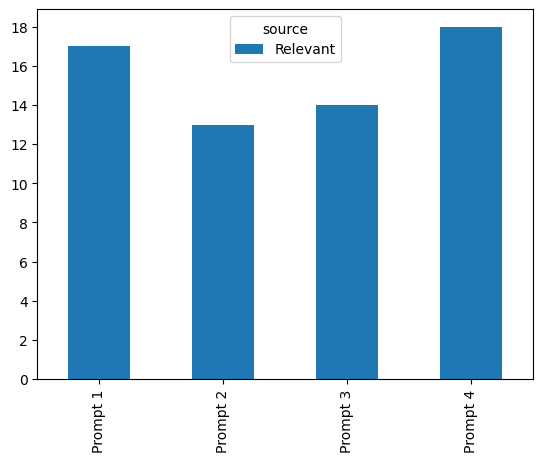

In [40]:
ax = source_df[["Relevant"]].plot(kind='bar', stacked=True)
ax.yaxis.set_ticks(np.arange(0, 20, 2))
ax.set(xlabel=None)
plt.savefig("img/eval-source.pdf", bbox_inches='tight')

In [41]:
response_df = pd.crosstab(base_df_long['PID'], base_df_long['response'])

In [42]:
response_df

response,City-level,Irrelevant,Parcel-level,Street-level,Suburb-level
PID,,,,,
Prompt 1,0,4,10,6,0
Prompt 2,1,9,3,1,6
Prompt 3,4,5,6,4,1
Prompt 4,3,8,2,1,6


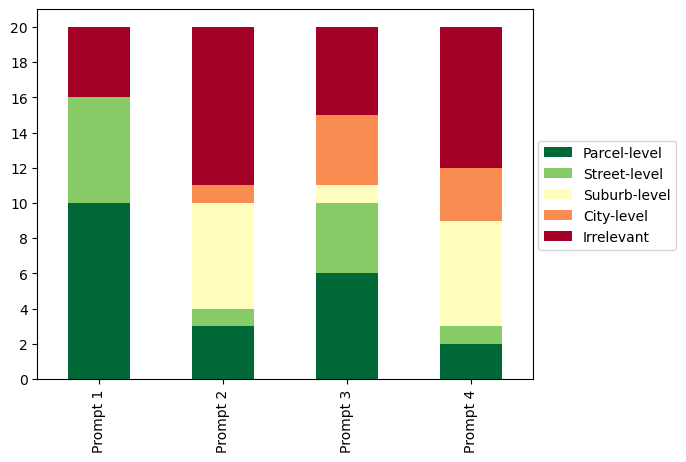

In [53]:
ax = response_df[["Parcel-level", "Street-level", "Suburb-level", "City-level", "Irrelevant"]].\
            plot(kind='bar', stacked=True, colormap='RdYlGn_r')
lgd = ax.legend(loc =(1.01, 0.35))
ax.yaxis.set_ticks(np.arange(0, 22, 2))
ax.set(xlabel=None)
plt.savefig("img/eval-response.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [106]:
geocoding_details

,file,prompt,simple,xyz,google,lat,lon,ambiguity (m),error (simple),error (xyz),error (google)
0,5211_H7822-2387 Bell Railway Station Archaeolo...,0,"[-37.7426028, 144.9779657]",None,"[-37.7449935, 145.0004241]",-37.744886,145.000411,13.323954,1994.424485,NaN,1.197419e+01
1,5211_H7822-2387 Bell Railway Station Archaeolo...,1,"[-37.80825865, 144.9626923904321]","[-37.74302, 148.04112]","[-37.8073454, 144.9628678]",-37.744886,145.000411,13.323954,7779.271897,267987.165795,7.681084e+03
2,5211_H7822-2387 Bell Railway Station Archaeolo...,2,"[-37.8142454, 144.9631732]","[-37.76371, 144.9848]","[53.763201, -2.70309]",-37.744886,145.000411,13.323954,8368.144579,2501.544534,1.697653e+07
3,5211_H7822-2387 Bell Railway Station Archaeolo...,3,"[-37.697305650000004, 145.06625435609772]","[-37.75807, 145.01674]","[-37.6948854, 145.0622727]",-37.744886,145.000411,13.323954,7847.766596,2052.345225,7.781095e+03
4,5204_GangeBurialGround_H7821-0117.pdf,0,"[-38.154971, 144.5819868]","[-38.17346, 144.572]","[-38.1545169, 144.5826794]",-38.153789,144.582705,124.884836,145.530813,2376.495109,8.083069e+01
...,...,...,...,...,...,...,...,...,...,...,...
71,5185_Historic Cultural Heritage Assessment Wal...,3,"[-33.4582095, 149.5499247]",None,"[40.8038247, -73.9401292]",-37.415177,145.014303,22.927160,601787.998713,NaN,1.666058e+07
72,"5190_Consent to Damage (C1746) report, Former ...",0,"[-36.652848, 144.39275026999468]",None,"[-36.6684939, 144.4010957]",-36.651087,144.411151,359.749983,1656.880267,NaN,2.130588e+03
73,"5190_Consent to Damage (C1746) report, Former ...",1,"[-37.8142454, 144.9631732]","[-37.82083, 144.9713]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983,138070.837551,139009.818362,1.380032e+05
74,"5190_Consent to Damage (C1746) report, Former ...",2,"[-37.8142454, 144.9631732]","[-36.71693, 147.63867]","[-37.8136276, 144.9630576]",-36.651087,144.411151,359.749983,138070.837551,288550.165947,1.380032e+05


In [107]:
melb_coords = [-37.00, 144.5]
melbourne_map = folium.Map(location = melb_coords, zoom_start = 8)
for idx, row in geocoding_details.iterrows():
    folium.Circle([row['lat'], row['lon']], radius=row['ambiguity (m)']).add_to(melbourne_map)
melbourne_map